# About the data

MHP (Anxiety, Stress, Depression) Dataset of University Students," comprises data from 2,028 students across 15 top-ranked universities in Bangladesh, including both public and private institutions. The data collection utilized standardized assessment tools: GAD-7 for Anxiety, PSS-10 for Stress, and PHQ-9 for Depression. Additionally, sociodemographic information was gathered to provide context. This comprehensive dataset is valuable for analyzing mental health problems among university students and can support the development of predictive models and mental health interventions.

# 1. Data Preparation

#### Loading dataset

In [96]:
import pandas as pd
df=pd.read_csv('depression.csv')

#### Displaying dataset

In [97]:
df.head()

1. Age 2. Gender                                      3. University  \
0  18-22    Female           Independent University, Bangladesh (IUB)   
1  18-22      Male           Independent University, Bangladesh (IUB)   
2  18-22      Male  American International University Bangladesh (...   
3  18-22      Male  American International University Bangladesh (...   
4  18-22      Male                       North South University (NSU)   

                                  4. Department           5. Academic Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
3  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
4  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   

  6. Current CGPA  \
0     2.50 - 2.99   
1     3.00 - 3.39   
2     3.00 - 3.39   
3     3.00 - 3.39   
4     2.50 - 2.99   

  7. Did you receive a waiver or scholarship at your university?  \
0                                                 No               
1                                                 No               
2                                                 No               
3                                                 No               
4                                                 No               

   1. In a semester, how often have you had little interest or pleasure in doing things?  \
0                                                  2                                       
1                                                  3                                       
2                                                  0                                       
3                                                  2                                       
4                                                  1                                       

   2. In a semester, how often have you been feeling down, depressed or hopeless?  \
0                                                  2                                
1                                                  2                                
2                                                  0                                
3                                                  1                                
4                                                  3                                

   3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?   \
0                                                  3                                                    
1                                                  2                                                    
2                                                  0                                                    
3                                                  2                                                    
4                                                  3                                                    

   4. In a semester, how often have you been feeling tired or having little energy?   \
0                                                  2                                   
1                                                  2                                   
2                                                  0                                   
3                                                  1                                   
4                                                  3                                   

   5. In a semester, how often have you had poor appetite or overeating?   \
0                                                  2                        
1                                                  2                        
2                                                  0                        
3                         

#### Basic Information about dataset

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 18 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 2028 non-null   object
 1   2. Gender                                                                                                                                                              2028 non-null   object
 2   3. University                                                                                               

## Step 1: Data Cleaning & Preprocessing

#### Renaming columns to remove numbering and standardizing names

In [99]:
df.columns = [
    "Age", "Gender", "University", "Department", "Academic_Year", "CGPA", "Scholarship",
    "Little_Interest", "Feeling_Down", "Sleep_Issues", "Fatigue", "Appetite_Issues",
    "Self_Worth", "Concentration_Issues", "Restlessness", "Self_Harm_Thoughts",
    "Depression_Value", "Depression_Label"
]
df

Age  Gender                                         University  \
0     18-22  Female           Independent University, Bangladesh (IUB)   
1     18-22    Male           Independent University, Bangladesh (IUB)   
2     18-22    Male  American International University Bangladesh (...   
3     18-22    Male  American International University Bangladesh (...   
4     18-22    Male                       North South University (NSU)   
...     ...     ...                                                ...   
2023  18-22    Male                              Dhaka University (DU)   
2024  18-22  Female           Bangladesh Agricultural University (BAU)   
2025  18-22    Male  American International University Bangladesh (...   
2026  23-26  Female                              Dhaka University (DU)   
2027  18-22    Male           Independent University, Bangladesh (IUB)   

                                        Department              Academic_Year  \
0     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
3     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
4     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
...                                            ...                        ...   
2023                                         Other  Second Year or Equivalent   
2024  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2025  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
2026                                         Other   Third Year or Equivalent   
2027         Business and Entrepreneurship Studies  Second Year or Equivalent   

             CGPA Scholarship  Little_Interest  Feeling_Down  Sleep_Issues  \
0     2.50 - 2.99          No                2             2             3   
1     3.00 - 3.39          No                3             2             2   
2     3.00 - 3.39          No                0             0             0   
3     3.00 - 3.39          No                2             1             2   
4     2.50 - 2.99          No                1             3             3   
...           ...         ...              ...           ...           ...   
2023  3.00 - 3.39          No                1             1             3   
2024  3.00 - 3.39          No                0             3             3   
2025  2.50 - 2.99          No                1             1             2   
2026  3.40 - 3.79          No                3             3             3   
2027  2.50 - 2.99          No                1             2             1   

      Fatigue  Appetite_Issues  Self_Worth  Concentration_Issues  \
0           2                2           2                     2   
1           2                2           2                     2   
2           0                0           0                     0   
3           1                2           1                     2   
4           3                1           3                     0   
...       ...              ...         ...                   ...   
2023        3                0           3                     2   
2024        3                2           3                     1   
2025        1                2           2                     2   
2026        3                3           3                     3   
2027        2                2           1                     1   

      Restlessness  Self_Harm_Thoughts  Depression_Value  \
0                3                   2                20   
1                2                   2                19   
2                0                   0                 0   
3                2                   1                14   
4                3                   3                20   
...            ...              

## Step 2: Handling missing values

In [100]:
df.isnull().sum()

Age                     0
Gender                  0
University              0
Department              0
Academic_Year           0
CGPA                    0
Scholarship             0
Little_Interest         0
Feeling_Down            0
Sleep_Issues            0
Fatigue                 0
Appetite_Issues         0
Self_Worth              0
Concentration_Issues    0
Restlessness            0
Self_Harm_Thoughts      0
Depression_Value        0
Depression_Label        0
dtype: int64

#### Displaying classes in target column

In [101]:
df['Depression_Label'].unique()

array(['Severe Depression', 'Moderately Severe Depression',
       'No Depression', 'Moderate Depression', 'Minimal Depression',
       'Mild Depression'], dtype=object)

## Step 3: Feature Engineering

In [102]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}

categorical_columns = ["Age", "Gender", "CGPA", "Scholarship", "Depression_Label"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  
    
    # Displaying the mapping of original values to encoded values
    print(f"Label encoding for '{col}':")
    for original, encoded in zip(le.classes_, range(len(le.classes_))):
        print(f"{original} -> {encoded}")
    print()  

df.head()

Label encoding for 'Age':
18-22 -> 0
23-26 -> 1
27-30 -> 2
Above 30 -> 3
Below 18 -> 4

Label encoding for 'Gender':
Female -> 0
Male -> 1
Prefer not to say -> 2

Label encoding for 'CGPA':
2.50 - 2.99 -> 0
3.00 - 3.39 -> 1
3.40 - 3.79 -> 2
3.80 - 4.00 -> 3
Below 2.50 -> 4
Other -> 5

Label encoding for 'Scholarship':
No -> 0
Yes -> 1

Label encoding for 'Depression_Label':
Mild Depression -> 0
Minimal Depression -> 1
Moderate Depression -> 2
Moderately Severe Depression -> 3
No Depression -> 4
Severe Depression -> 5



Age  Gender                                         University  \
0    0       0           Independent University, Bangladesh (IUB)   
1    0       1           Independent University, Bangladesh (IUB)   
2    0       1  American International University Bangladesh (...   
3    0       1  American International University Bangladesh (...   
4    0       1                       North South University (NSU)   

                                     Department              Academic_Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
3  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
4  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   

   CGPA  Scholarship  Little_Interest  Feeling_Down  Sleep_Issues  Fatigue  \
0     0            0                2             2             3        2   
1     1            0                3             2             2        2   
2     1            0                0             0             0        0   
3     1            0                2             1             2        1   
4     0            0                1             3             3        3   

   Appetite_Issues  Self_Worth  Concentration_Issues  Restlessness  \
0                2           2                     2             3   
1                2           2                     2             2   
2                0           0                     0             0   
3                2           1                     2             2   
4                1           3                     0             3   

   Self_Harm_Thoughts  Depression_Value  Depression_Label  
0                   2                20                 5  
1                   2                19                 3  
2                   0                 0                 4  
3                   1                14                 2  
4                   3                20                 5

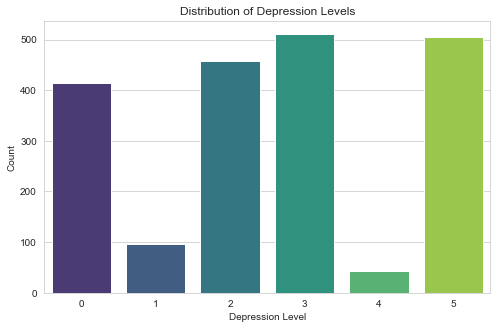

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Distribution of Depression Levels
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Depression_Label"], palette="viridis")
plt.xlabel("Depression Level")
plt.ylabel("Count")
plt.title("Distribution of Depression Levels")
plt.show()

## Step 4: Feature Selection

### Using Correlation Matrix

Depression_Value        1.000000
Depression_Label        0.832677
Feeling_Down            0.810137
Self_Worth              0.797408
Concentration_Issues    0.755087
Fatigue                 0.750082
Sleep_Issues            0.730538
Restlessness            0.729416
Appetite_Issues         0.706853
Self_Harm_Thoughts      0.702010
Little_Interest         0.423536
Gender                  0.099661
Age                     0.051151
Scholarship             0.040472
CGPA                    0.020314
Name: Depression_Value, dtype: float64


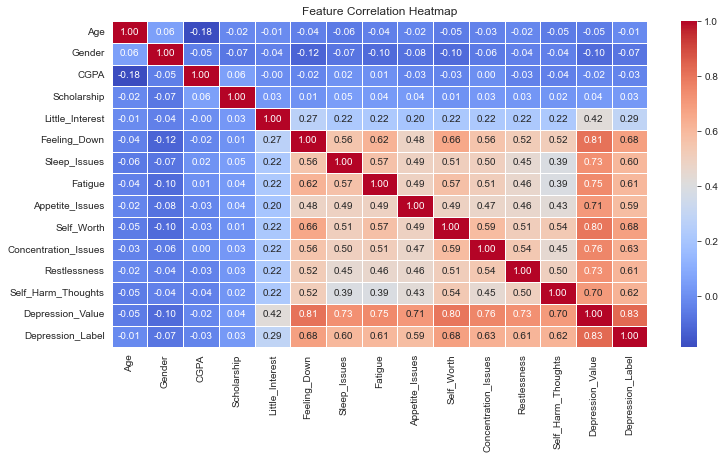

In [104]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Computing correlation matrix
df_numeric = df.select_dtypes(include=[np.number])  
corr_matrix = df_numeric.corr()


# Sorting features based on correlation with Depression_Value
corr_target = corr_matrix["Depression_Value"].abs().sort_values(ascending=False)

print(corr_target)

# Plot heatmap of most correlated features
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Using Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Defining features (X) and target (y)
X = df.drop(columns=[
    "Depression_Value", "Depression_Label", 
    "University", "Department", "Academic_Year", 
    "CGPA", "Age", "Gender", "Scholarship"  
])
y = df["Depression_Label"]


model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_

# Sorting features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]:.4f}")


Feeling_Down: 0.1713
Self_Harm_Thoughts: 0.1593
Concentration_Issues: 0.1201
Fatigue: 0.1123
Self_Worth: 0.0962
Appetite_Issues: 0.0947
Little_Interest: 0.0933
Restlessness: 0.0886
Sleep_Issues: 0.0642


### Insights
No missing values in any columns. The dataset is complete.

Depression_Label and Depression_Value are highly correlated (0.83), which is expected.


Feeling_Down, Self_Worth, Concentration_Issues, Fatigue, and Sleep_Issues have the strongest correlations (>0.7) with Depression_Value.


CGPA, Age, and Scholarship have very weak correlations (<0.1), indicating they might not be significant predictors.

# 2. Model Development

In [106]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Depression_Value", "Depression_Label", "University", "Department", "Academic_Year"])  
y = df["Depression_Label"]  

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Step 1: Training Models

### Model 1:Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training Logistic Regression
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)

# Predicting
y_pred_lr = lr_model.predict(X_test)

# Evaluating
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7758620689655172
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        83
           1       0.50      0.05      0.10        19
           2       0.75      0.47      0.58        92
           3       0.74      0.86      0.80       102
           4       1.00      0.33      0.50         9
           5       0.96      1.00      0.98       101

    accuracy                           0.78       406
   macro avg       0.77      0.61      0.62       406
weighted avg       0.78      0.78      0.75       406



C:\Users\samri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Model 2: XGBClassifier

In [108]:
from xgboost import XGBClassifier

# Training XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predicting
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\samri\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8817733990147784
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        83
           1       0.80      0.63      0.71        19
           2       0.85      0.84      0.84        92
           3       0.86      0.89      0.88       102
           4       1.00      1.00      1.00         9
           5       0.97      0.94      0.95       101

    accuracy                           0.88       406
   macro avg       0.89      0.87      0.87       406
weighted avg       0.88      0.88      0.88       406



### Model 3: Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test)

# Evaluating
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8940886699507389
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.88      0.79      0.83        19
           2       0.84      0.83      0.83        92
           3       0.88      0.90      0.89       102
           4       1.00      1.00      1.00         9
           5       0.98      0.96      0.97       101

    accuracy                           0.89       406
   macro avg       0.91      0.89      0.90       406
weighted avg       0.89      0.89      0.89       406



## Step 2: Comparing Models

### Using Confusion Matrix

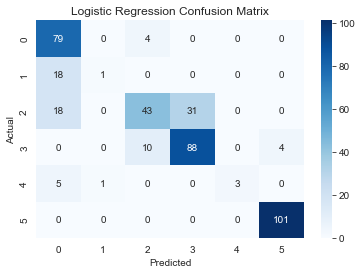

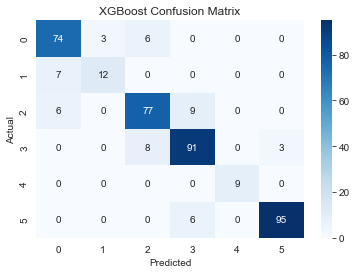

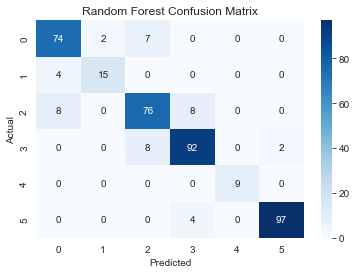

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

### Using Accuracy, Precision, Recall, F1-score

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

# Evaluating all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Logistic Regression Evaluation ---
Accuracy: 0.7759
Precision: 0.7762
Recall: 0.7759
F1-score: 0.7495

--- Random Forest Evaluation ---
Accuracy: 0.8941
Precision: 0.8946
Recall: 0.8941
F1-score: 0.8941

--- XGBoost Evaluation ---
Accuracy: 0.8818
Precision: 0.8821
Recall: 0.8818
F1-score: 0.8812



### Using ROC-AUC Curve

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Getting probability predictions for models
y_probs_rf = rf_model.predict_proba(X_test)  # Random Forest
y_probs_xgb = xgb_model.predict_proba(X_test)  # XGBoost
y_probs_lr = lr_model.predict_proba(X_test)  # Logistic Regression

# Computing ROC-AUC
roc_auc_rf = roc_auc_score(y_test_bin, y_probs_rf, multi_class='ovr')
roc_auc_xgb = roc_auc_score(y_test_bin, y_probs_xgb, multi_class='ovr')
roc_auc_lr = roc_auc_score(y_test_bin, y_probs_lr, multi_class='ovr')

print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")

Random Forest ROC-AUC: 0.9899
XGBoost ROC-AUC: 0.9895
Logistic Regression ROC-AUC: 0.9479


### Using Lime

In [113]:
import lime
import lime.lime_tabular

In [114]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    class_names=['0', '1', '2', '3', '4', '5'],  
    mode='classification'
)

# Mapping for reference
label_mapping = {
    0: 'Mild Depression',
    1: 'Minimal Depression',
    2: 'Moderate Depression',
    3: 'Moderately Severe Depression',
    4: 'No Depression',
    5: 'Severe Depression'
}

In [115]:
i = 5  

# LIME explanation
exp = explainer.explain_instance(X_test.iloc[i].values, xgb_model.predict_proba)

exp.show_in_notebook()

predicted_class = xgb_model.predict([X_test.iloc[i].values])[0]
print(f"Predicted Class: {predicted_class} -> {label_mapping[predicted_class]}")


Predicted Class: 2 -> Moderate Depression


In [116]:
i = 5  
exp_rf = explainer.explain_instance(X_test.iloc[i].values, rf_model.predict_proba)
exp_rf.show_in_notebook()

predicted_class_rf = rf_model.predict([X_test.iloc[i].values])[0]
print(f"Random Forest Predicted Class: {predicted_class_rf} -> {label_mapping[predicted_class_rf]}")

C:\Users\samri\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Predicted Class: 2 -> Moderate Depression


C:\Users\samri\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [117]:
exp_lr = explainer.explain_instance(X_test.iloc[i].values, lr_model.predict_proba)
exp_lr.show_in_notebook()

predicted_class_lr = lr_model.predict([X_test.iloc[i].values])[0]
print(f"Logistic Regression Predicted Class: {predicted_class_lr} -> {label_mapping[predicted_class_lr]}")

C:\Users\samri\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression Predicted Class: 3 -> Moderately Severe Depression


C:\Users\samri\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Insights
🎯 Best Model: Random Forest

It achieves the highest accuracy, recall, and F1-score.

It captures complex relationships better than Logistic Regression.

It slightly outperforms XGBoost in accuracy while being easier to interpret.

## Step 3: Saving Model

In [118]:
import joblib
# Save the trained Random Forest model
joblib.dump(rf_model, "mental_health_model.pkl")
print("Model saved successfully as 'mental_health_model.pkl'")

Model saved successfully as 'mental_health_model.pkl'
